# Analysis of SLM's grain powder.
# Korobov K.S.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use(['grid','notebook'])
plt.style.use(['grid','notebook', "dark_background"])

from skimage import io
import skimage.exposure as exposure
from skimage.color import rgb2gray, label2rgb
from skimage.measure import label, regionprops
from scipy import ndimage

In [2]:
img = io.imread("images/SLM_particles_1.jpg")

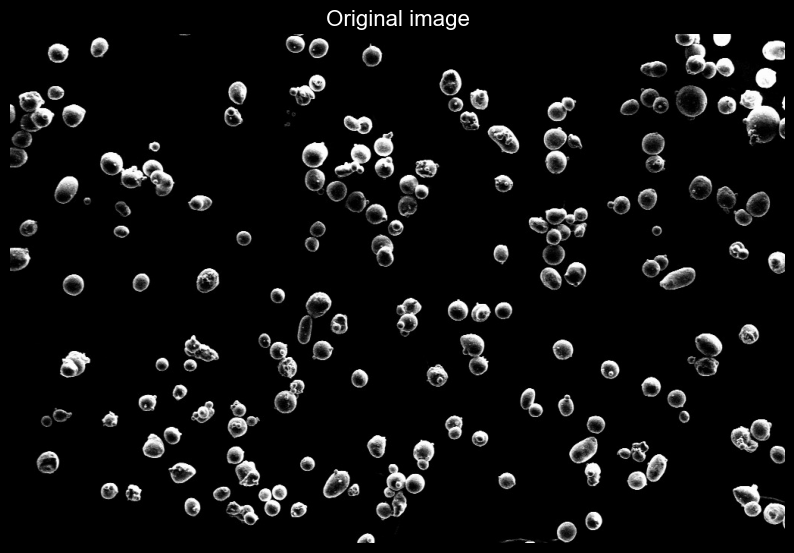

In [3]:
# Show img
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title("Original image")
plt.axis('off')
plt.show()

In [4]:
img.shape

(672, 1023, 3)

In [5]:
img[1][1]

array([0, 0, 0], dtype=uint8)

In [6]:
# Convert to grayscale
img_gray = rgb2gray(img)

# Rescale intensity
img_rescaled = exposure.rescale_intensity(img_gray, out_range=np.uint8)

In [7]:
img_gray.dtype

dtype('float64')

In [10]:
img_gray[1][50]

0.0

In [11]:
img_rescaled.dtype

dtype('uint8')

In [12]:
img_rescaled[1][50]

0

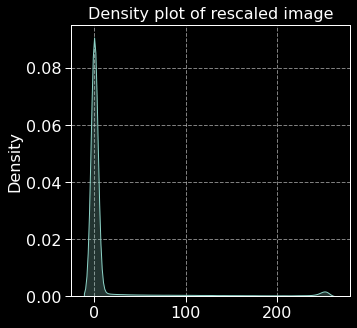

In [13]:
# Plot kde-plot using seaborn for img_rescaled
plt.figure(figsize=(5,5))
sns.kdeplot(img_rescaled.ravel(), shade=True)
plt.title("Density plot of rescaled image")
plt.show()

In [14]:
from skimage.filters import try_all_threshold, threshold_mean, threshold_otsu,\
    threshold_triangle, threshold_minimum, threshold_yen, threshold_isodata

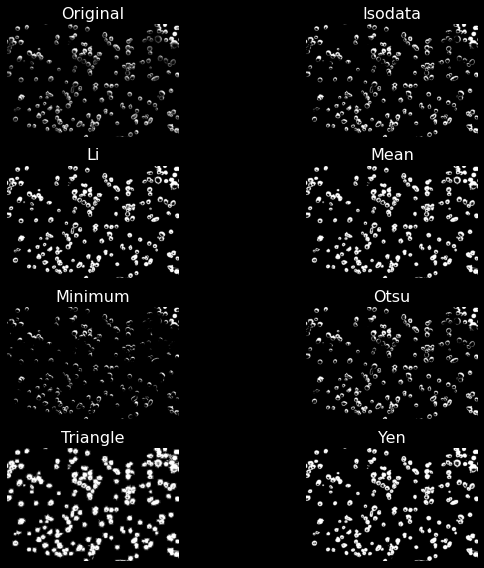

In [15]:
fig, ax = try_all_threshold(img_rescaled, figsize=(15, 8), verbose=False)
plt.tight_layout()

In [16]:
# Use mean threshold for img_rescaled
thresh_mean = threshold_mean(img_rescaled)

# Create binary image using mean threshold
img_mean = img_rescaled > thresh_mean

# Label connected regions
img_mean_label = label(img_mean)

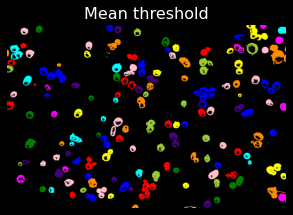

In [17]:
# Plot img_mean_label using label2rgb
plt.figure(figsize=(5,5))
plt.imshow(label2rgb(img_mean_label, bg_label=0))
plt.title("Mean threshold")
plt.axis('off')
plt.show()

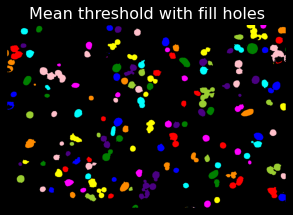

In [18]:
# Fill holes in img_mean using ndimage.binary_fill_holes
img_mean_fill = ndimage.binary_fill_holes(img_mean)

# Label connected regions
img_mean_fill_label = label(img_mean_fill)

# Erose img_mean_fill_dialate using ndimage.binary_erosion
img_mean_fill_erode = ndimage.binary_erosion(img_mean_fill_label, iterations=1)

# Dialate img_mean_fill_label using ndimage.binary_dilation
img_mean_fill_dialate = ndimage.binary_dilation(img_mean_fill_erode, iterations=1)


# Clean up img_mean_fill_erode using ndimage.binary_opening
img_mean_fill_open = ndimage.binary_opening(img_mean_fill_dialate)

# Label connected regions in img_mean_fill_erode
img_mean_fill_label = label(img_mean_fill_erode)

# Plot img_mean_fill_label using label2rgb

plt.figure(figsize=(5,5))
plt.imshow(label2rgb(img_mean_fill_label, bg_label=0))
plt.title("Mean threshold with fill holes")
plt.axis('off')
plt.show()

In [19]:
# Use regionprops to get properties of img_mean_fill_erode_label
regions = regionprops(img_mean_fill_label)

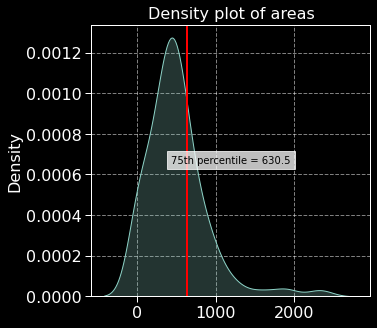

In [20]:
# Use regions to get area of each region
areas = [region.area for region in regions]

# Get 75th percentile of areas
area_thresh = np.percentile(areas, 75)

# Plot density plot of areas
plt.figure(figsize=(5,5))
sns.kdeplot(areas, shade=True)
plt.text(0.5, 0.5, "75th percentile = {}".format(area_thresh),
            horizontalalignment='center',
            verticalalignment='center',
            transform=plt.gca().transAxes,
            bbox=dict(facecolor='white', alpha=0.75),
            color='black')
plt.axvline(area_thresh, color='red')
plt.title("Density plot of areas")
plt.show()

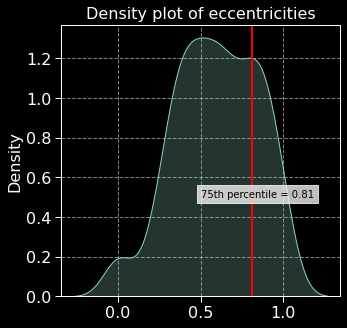

In [21]:
# Use regions to get eccentricity of each region
eccentricities = [region.eccentricity for region in regions]

# Get 75th percentile of eccentricities
eccentricity_quantile = np.quantile(eccentricities, 0.75)

# Plot density plot of eccentricities
plt.figure(figsize=(5,5))
sns.kdeplot(eccentricities, shade=True)
plt.title("Density plot of eccentricities")
plt.text(0.5, 0.5, "75th percentile = {:.2f}".format(eccentricity_quantile), bbox=dict(facecolor='white', alpha=0.75), color='black')
plt.axvline(eccentricity_quantile, color='red')
plt.show()